In [1]:
# change dir
import os
PROJECT_DIR = os.path.abspath(os.path.abspath('') + "/../..")
print(f"Changing directory to {PROJECT_DIR}")
os.chdir(PROJECT_DIR)

Changing directory to /home/S22/workspace/BasicTS


In [2]:
# import packages
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# hyperparameters
test_results_path = "checkpoints/STID/PEMS08_100_336_336/97d131cadc14bd2b9ffa892d59d55129/test_results.npz"

In [ ]:
# load test_results.npz
test_results = np.load(test_results_path)
print(test_results.files)

In [8]:
prediction = test_results['prediction'] # B, L, N, C
target = test_results['target'] # B, L, N, C
inputs = test_results['inputs'] # B, L, N, C

In [9]:
# select random sample
sample_id = random.randint(0, prediction.shape[0])
time_series_id = random.randint(0, prediction.shape[2]-1)
channel_id = random.randint(0, prediction.shape[3]-1)

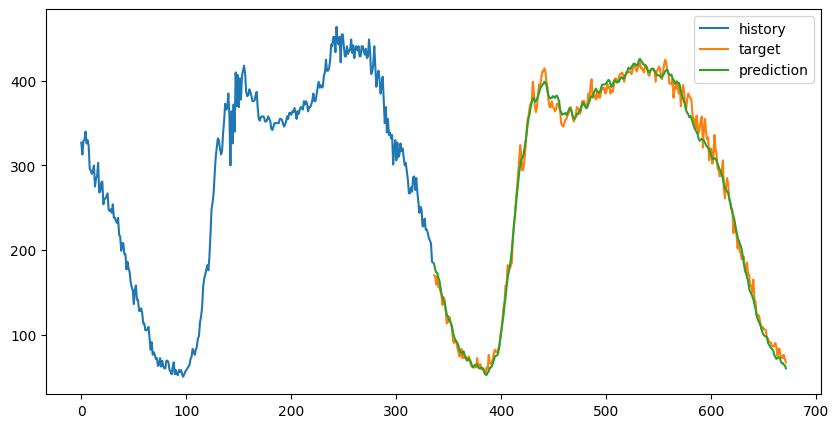

In [10]:
# plot history, targets, and predictions
plt.figure(figsize=(10, 5))
plt.plot(np.arange(inputs.shape[1]), inputs[sample_id, :, time_series_id, channel_id], label='history')
plt.plot(np.arange(inputs.shape[1], inputs.shape[1]+target.shape[1]), target[sample_id, :, time_series_id, channel_id], label='target')
plt.plot(np.arange(inputs.shape[1], inputs.shape[1]+prediction.shape[1]), prediction[sample_id, :, time_series_id, channel_id], label='prediction')
plt.legend()
plt.show()
